# Course-end Project : Employee Turnover Analytics

## Project Statement :
Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.

Data from prior evaluations shows the employees' satisfaction in the workplace. The data could be used to identify patterns in work style and their interrest in continuing to work for the company.

The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.

As the ML Developer assigned to the HR Department, you have been asked to create ML programs to :
1. Perform data quality checks by checking for missing values, if any.
2. Understand what factors contributed most to employee turnover at EDA.
3. Perform clustering of employees who left based on their satisfaction and evaluation.
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance.
6. Identify the best model and justify the evaluation mmetrics used.
7. Suggest various retention strategies for targeted employees.
ry in USD 


## Details of the Datasets :

- satisfaction_level : Satisfaction level at the job of an employee

- last_evaluation : Rating between 0 and 1, received by an employee at his last evaluation.

- number_project : The number of projects an employee is involved in

- average_montly_hours : Average number of hours in a month spent by an employee at the office

- time_spend_company : Number of years spent in the company

- Work_accident : 0 - no accident during employee stay, 1 - accident during employee stay

- left : 0	indicates an employee stays with the company and 
1	indicates an employee left the compan
  
- promotion_last_5years : Number of promotions in his stay

- Department : Department to which an employee belongs to
 - salary : Salary in USD 


## Steps to Perform:
1. Perform data quality checks by checking for missing values, if any.

2. Understand what factors contributed most to employee turnover at EDA.
   - Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
   - Draw the distribution plot of:
      - Employee Satisfaction (use column satisfaction_level)
      - Employee Evaluation (use column last_evaluation)
      - Employee 	Average 	Monthly 	Hours 	(use 	column average_montly_hours)
   - Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot. 

3. Perform clustering of employees who left based on their satisfaction and evaluation.
   - Choose columns satisfaction_level, last_evaluation, and left.
   - Do K-means clustering of employees who left the company into 3 clusters?
   - Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters. 

4. Handle the left Class Imbalance using the SMOTE technique.
   - Pre-process the data by converting categorical columns to numerical columns by:
      - Separating categorical variables and numeric variables
      - Applying get_dummies() to the categorical variables
      - Combining categorical variables and numeric variables  
   - Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
   - Upsample the train dataset using the SMOTE technique from the imblearn module.

5. Perform 5-fold cross-validation model training and evaluate performance.
   - Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
   - Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
   - Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.
  
6. Identify the best model and justify the evaluation metrics used.
   - Find the ROC/AUC for each model and plot the ROC curve.
   - Find the confusion matrix for each of the models.
   - Explain which metric needs to be used from the confusion matrix: 
Recall or Precision? 
7. Suggest various retention strategies for targeted employees.
   - Using the best model, predict the probability of employee turnover in the test data.
   - Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
      - Safe Zone (Green) (Score < 20%)
      - Low-Risk Zone (Yellow) (20% < Score < 60%)
      - Medium-Risk Zone (Orange) (60% < Score < 90%)
      - High-Risk Zone (Red) (Score > 90%). 


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in dataset

In [2]:
data = pd.read_csv('HR_comma_sep.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
data.rename(columns = {'sales': 'Department'}, inplace = True, errors = 'raise')

#### The dimensionality of the Employee Turnover data is checked using pandas :: info() method

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Treating Missing Value

In [5]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

#### From the above output it is clear that there are no missing values in the Employee Turnover data. The data contains 14,999 records and 10 columns/features.

### Treating duplicates

In [6]:
data.duplicated().sum()

3008

In [7]:
data = data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

In [9]:
numeric_data = data.select_dtypes('number').drop(columns = ['Work_accident', 'left', 'promotion_last_5years'])
numeric_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


In [10]:
data_corr_matrix = numeric_data.corr()
data_corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000


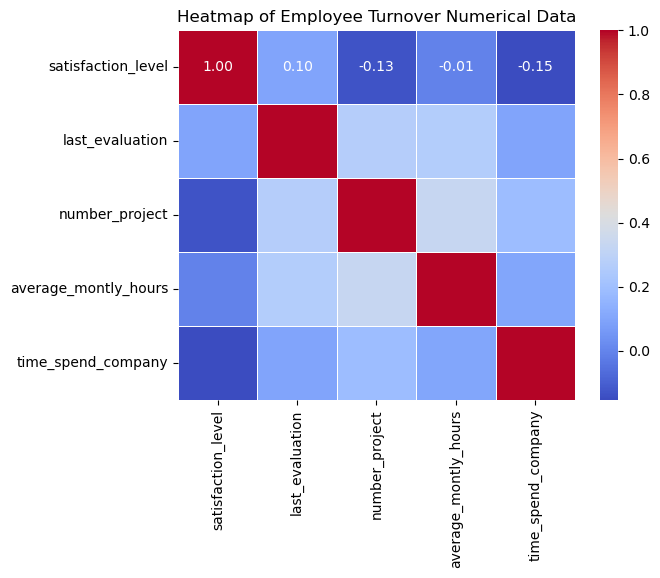

In [11]:
sns.heatmap(data_corr_matrix, annot = True, cmap = 'coolwarm', fmt = '0.2f', linewidths = 0.5)
plt.title("Heatmap of Employee Turnover Numerical Data")
plt.show()

#### The following observation can be made from the above heatmap:

- There is significant +ve correlation between **"average_monthly_hours"** and **"number_project"**. As the number of projects worked by the employee increases, the number of hours worked monthly by the employee increases as well.

- There is significant +ve correlation between **"average_monthly_hours"** and **"last_evaluation"**.  As the monthly hours worked by the employee increases, the last evaluation score of the employee increases as well.

- There is a significant +ve correlation between **"number_project"*** and **"last_evaluation"**. As the number of projects worked by employee increases, his evaluation score increases.

- There is a slightly +ve corelation between **"time_spend_company"** and **"number_project"**. As the employee spends more time with the company, he works in more number of projects as well.

- There is a slight -ve corelation between **"number_project"** and **"satisfaction_level"**. As the employee worls on more projects, his satisfaction level decreases.

### Review data distribution for specific columns

#### Data distribution of employee satisfaction levels

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


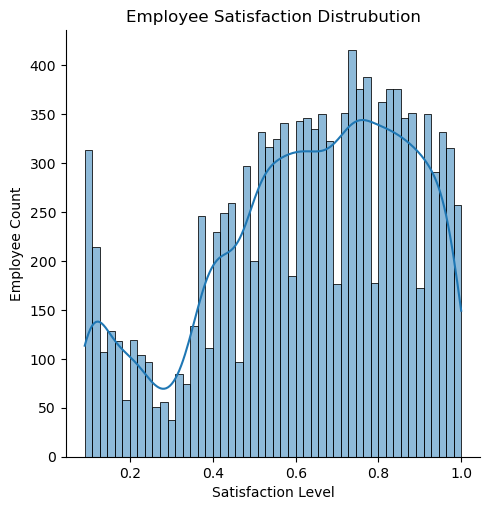

In [12]:
sns.displot(x ='satisfaction_level', data = data, kde = True, bins = 50)
plt.xlabel("Satisfaction Level")
plt.ylabel("Employee Count")
plt.title("Employee Satisfaction Distrubution")
plt.show()

#### The following observations can be made about the employee satisfaction distribution curve:
- The employee satisfaction data distribution shows a vast majority of employees have high satisfaction levels (>=0.5)

- The employee satisfaction data distribution shows a significant number of employees having satisfaction levels close to 0o 0

### Data distribution of employee evaluation

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


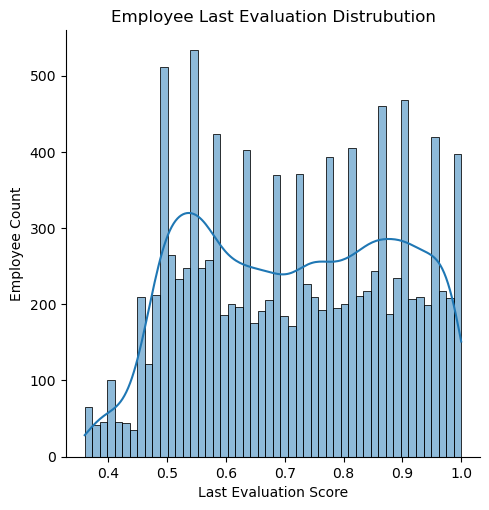

In [13]:
sns.displot(x ='last_evaluation', data = data, kde = True, bins = 50)
plt.xlabel("Last Evaluation Score")
plt.ylabel("Employee Count")
plt.title("Employee Last Evaluation Distrubution")
plt.show()

#### The following observations can be made about the employee last evaluation curve:

- A large number of employees are rated 0.5 and between 0.8-0.9

- Hardly any employees are evaluated less than 0.4

- Employees rated in the 0.6-0.8 evaluation levels are lesser compared to 0.5 and 08/0.9

In [14]:
### Data distribution of monthly hours worked

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


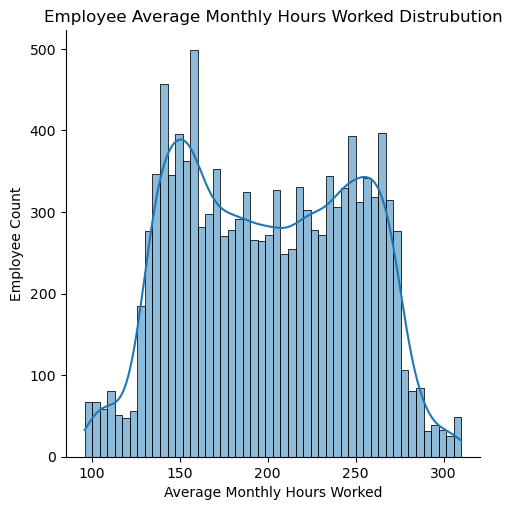

In [15]:
sns.displot(x ='average_montly_hours', data = data, kde = True, bins = 50)
plt.xlabel("Average Monthly Hours Worked")
plt.ylabel("Employee Count")
plt.title("Employee Average Monthly Hours Worked Distrubution")
plt.show()

#### The following observations can be made about the employee average monthly hours worked curve:

- A large number of employees work around 150 hours per month and similar amount of employees work around 250+ hours per month.

- Quite a lot of employees work between 180-220 hours per month.

- Very less number of employees work lesser than 130 hours or greater than 280 hours per month.

### Employee status relationship with number of projects worked in

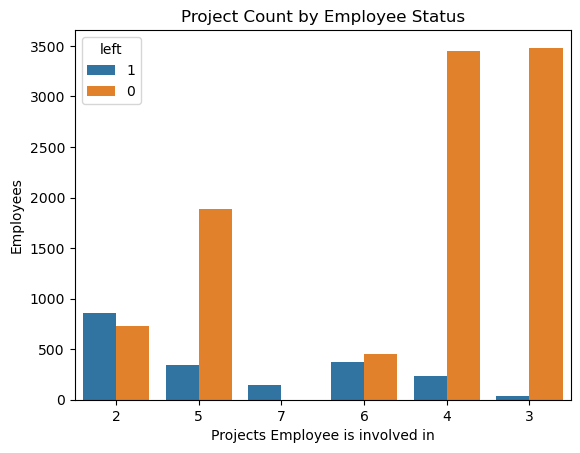

In [16]:
sns.countplot(x = "number_project", hue = "left", data = data.astype(str))
plt.xlabel("Projects Employee is involved in")
plt.ylabel("Employees")
plt.title("Project Count by Employee Status")
plt.show()

#### From this visualization the following observations can be made:

- Employees who work between 3-5 projects typically stay with the company.

- Employees who work in 2, 6 or 7 projects leave the company

### Clustering of employees

In [17]:
from sklearn.cluster import KMeans

In [18]:
df = data[data['left']==1].loc[:,['satisfaction_level', 'last_evaluation', 'left']]
df

,satisfaction_level,last_evaluation,left
0,0.38,0.53,1
1,0.80,0.86,1
2,0.11,0.88,1
3,0.72,0.87,1
4,0.37,0.52,1
...,...,...,...
1995,0.37,0.57,1
1996,0.11,0.92,1
1997,0.41,0.53,1
1998,0.84,0.96,1


In [19]:
newmodel = KMeans(n_clusters = 3, random_state = 25)
y_kmeans = newmodel.fit_predict(df)

D:\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
newmodel.cluster_centers_

array([[0.80587387, 0.91257658, 1.        ],
       [0.41013304, 0.51719512, 1.        ],
       [0.1111985 , 0.86906367, 1.        ]])

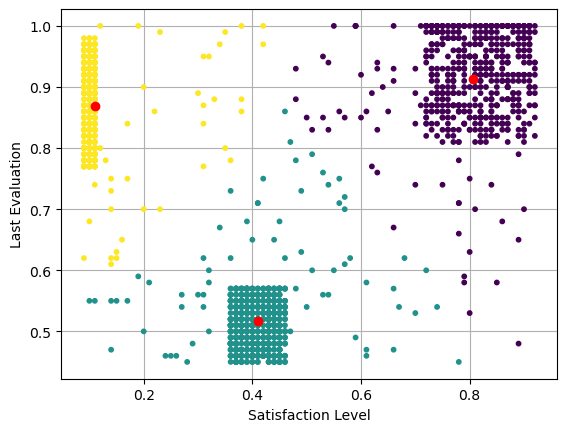

In [21]:
plt.scatter(df.satisfaction_level, df.last_evaluation, c = y_kmeans, s = 10)
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.gca().set_axisbelow(True)
plt.grid()
plt.scatter(newmodel.cluster_centers_[:,0], newmodel.cluster_centers_[:,1],  c = 'red')
plt.show()

#### From the visual the following observations can be made:

- The does not seem to be any corelation of the last evaluation on the employee satisfaction levels. That is because there are two clusters having roughly yhe same employee evaluation scores but diametrically opposite satisfaction levels.

- As expected, there is one cluster where a lower last evaluation score results in low-to-mid satisfaction levels.

### Pre-Process data

In [22]:
num_data = data.select_dtypes('number')
num_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1
11996,0.74,0.95,5,266,10,0,0,1
11997,0.85,0.54,3,185,10,0,0,1
11998,0.33,0.65,3,172,10,0,0,1


In [23]:
categorical_data = data.select_dtypes('object')
categorical_data

,Department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
11995,management,high
11996,management,high
11997,management,high
11998,marketing,high


In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [25]:
categorical_data['Label_Encoded_Salary'] = categorical_data['salary'].map({'low':0, 'medium': 1, 'high':2})

In [26]:
categorical_data[['salary','Label_Encoded_Salary']]

,salary,Label_Encoded_Salary
0,low,0
1,medium,1
2,medium,1
3,low,0
4,low,0
...,...,...
11995,high,2
11996,high,2
11997,high,2
11998,high,2


In [27]:
dummies = pd.get_dummies(categorical_data, columns = ['Department'], dtype = 'int')

In [28]:
dummies

,salary,Label_Encoded_Salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,low,0,0,0,0,0,0,0,0,1,0,0
1,medium,1,0,0,0,0,0,0,0,1,0,0
2,medium,1,0,0,0,0,0,0,0,1,0,0
3,low,0,0,0,0,0,0,0,0,1,0,0
4,low,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,high,2,0,0,0,0,1,0,0,0,0,0
11996,high,2,0,0,0,0,1,0,0,0,0,0
11997,high,2,0,0,0,0,1,0,0,0,0,0
11998,high,2,0,0,0,0,0,1,0,0,0,0


In [29]:
merge_data = pd.concat([num_data, dummies], axis = 1, join = "inner")

In [30]:
merge_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Label_Encoded_Salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,high,2,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,high,2,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,high,2,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,high,2,0,0,0,0,0,1,0,0,0,0


In [31]:
merge_data.drop(columns = ['salary'], inplace = True)

In [32]:
merge_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Label_Encoded_Salary,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,2,0,0,0,0,1,0,0,0,0,0
11996,0.74,0.95,5,266,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11997,0.85,0.54,3,185,10,0,0,1,2,0,0,0,0,1,0,0,0,0,0
11998,0.33,0.65,3,172,10,0,0,1,2,0,0,0,0,0,1,0,0,0,0


#### Perform split of data into train_test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X = merge_data.drop("left", axis = 1)
y = merge_data["left"]

In [35]:
y.value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

#### From the above output we can see that there is class imbalance in the target variable. For this reason we have to perform stratified split of data when performing the train/test split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [37]:
print(y_train.value_counts(),y_test.value_counts())

left
0    7991
1    1601
Name: count, dtype: int64 left
0    2009
1     390
Name: count, dtype: int64


#### From the above output we can see that there is class imbalance of the target variable. This will be rectified using SMOTE technique after column transformation in the section below.

### Over sampling for removing class imbalance

#### Since there is class imbalance we need to perform SMOTE (Sytthetic Minority Oversampling) to ensure that there is balance between 'left':0 and 'left':1 in train data. Note SMOTE wil not be run on test data.

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [40]:
print("Original shape:", X_train.shape, y_train.shape)
print ("SMOTE sample shape:", X_train_sm.shape, y_train_sm.shape)
print(y_train_sm.value_counts())

Original shape: (9592, 18) (9592,)
SMOTE sample shape: (15982, 18) (15982,)
left
0    7991
1    7991
Name: count, dtype: int64


### Model training and evaluating performance

In [41]:
 from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

### Logistic Regression

In [42]:
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [43]:
print(cross_val_score(logreg, X_train, y_train, cv=5).mean())
print("RMSE  :-", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 SCORE  :-", r2_score(y_test, y_pred))

0.8289184875899368
RMSE  :- 0.40782263265813457
R2 SCORE  :- -0.2216831948539264


In [44]:
confusion_matrix(y_test,y_pred)     

array([[1938,   71],
       [ 328,   62]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2009
           1       0.47      0.16      0.24       390

    accuracy                           0.83      2399
   macro avg       0.66      0.56      0.57      2399
weighted avg       0.79      0.83      0.80      2399



In [46]:
roc_auc_score(y_test,y_pred)

0.5618166966599022

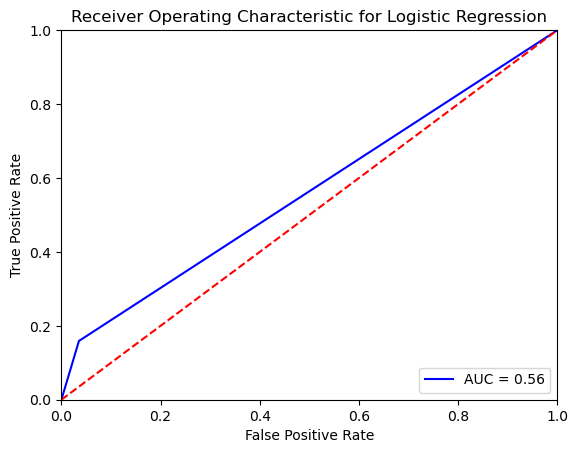

In [47]:
fpr, tpr, thresh = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# method I: plt
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier

In [48]:
random = RandomForestClassifier(max_depth=5)
random.fit(X_train,y_train)
y_pred1 = random.predict(X_test)

In [49]:
print(cross_val_score(random, X_train, y_train, cv=5).mean())
print("RMSE  :-", np.sqrt(mean_squared_error(y_test, y_pred1)))
print("R2 SCORE  :-", r2_score(y_test, y_pred1))

0.9432853290268384
RMSE  :- 0.24500002126736387
R2 SCORE  :- 0.5590917793008385


In [50]:
confusion_matrix(y_test,y_pred1)  

array([[2001,    8],
       [ 136,  254]], dtype=int64)

In [51]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2009
           1       0.97      0.65      0.78       390

    accuracy                           0.94      2399
   macro avg       0.95      0.82      0.87      2399
weighted avg       0.94      0.94      0.94      2399



In [52]:
roc_auc_score(y_test,y_pred1)

0.8236499853224591

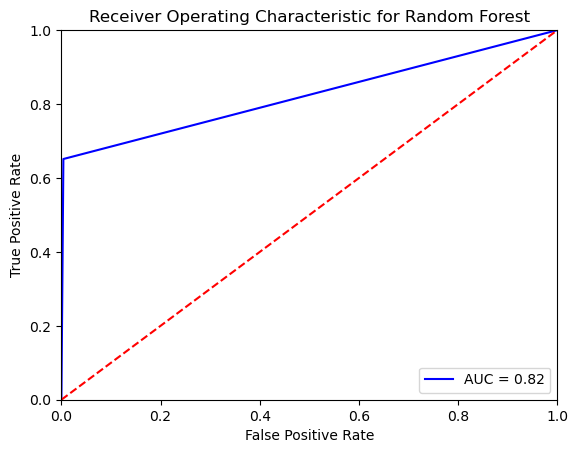

In [53]:
fpr, tpr, thresh = roc_curve(y_test, y_pred1)
roc_auc = roc_auc_score(y_test, y_pred1)

# method I: plt
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Grdaient Bossting Classifier

In [54]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gb.fit(X_train,y_train)
y_pred2 = gb.predict(X_test)

In [55]:
print(cross_val_score(random, X_train, y_train, cv=5).mean())
print("RMSE  :-", np.sqrt(mean_squared_error(y_test, y_pred2)))
print("R2 SCORE  :-", r2_score(y_test, y_pred2))

0.943076887130017
RMSE  :- 0.18600470172043826
R2 SCORE  :- 0.7458654005692333


In [56]:
confusion_matrix(y_test,y_pred2)

array([[1960,   49],
       [  34,  356]], dtype=int64)

In [57]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2009
           1       0.88      0.91      0.90       390

    accuracy                           0.97      2399
   macro avg       0.93      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399



In [58]:
roc_auc_score(y_test,y_pred2)

0.9442151344590368

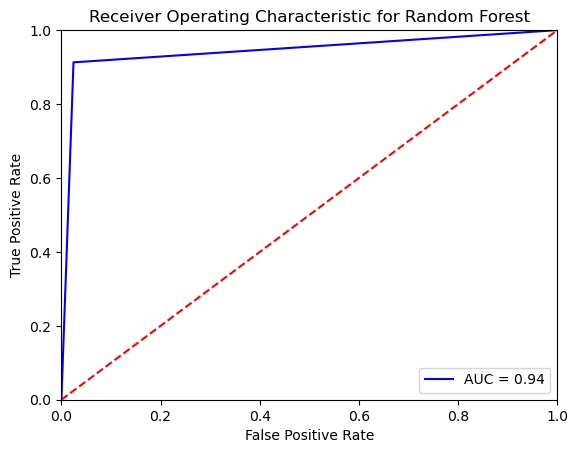

In [59]:
fpr, tpr, thresh = roc_curve(y_test, y_pred2)
roc_auc = roc_auc_score(y_test, y_pred2)

# method I: plt
plt.title('Receiver Operating Characteristic for Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 
Since Random Forest shows the highest accuracy with good f1 score, we will conclude that to be our best performing model.

Based on the confusion matrix, the false negatives should be low because if an employee who might leave the organisation is misclassified as someone who won't leave then proper strategies to retain that person will not be implemented on him or her. Hence Recall is better metric to be used



In [60]:
col = X_train.columns

In [61]:
col

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Label_Encoded_Salary', 'Department_IT',
       'Department_RandD', 'Department_accounting', 'Department_hr',
       'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical'],
      dtype='object')

In [62]:
feature_labels = np.array(col)

In [63]:
importance = random.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
     

Department_product_mng-0.01%
Department_sales-0.01%
Department_accounting-0.02%
Department_marketing-0.02%
Department_IT-0.03%
Department_support-0.03%
Department_technical-0.03%
Department_hr-0.03%
Department_management-0.05%
Department_RandD-0.06%
promotion_last_5years-0.08%
Label_Encoded_Salary-0.62%
Work_accident-1.02%
last_evaluation-11.17%
time_spend_company-14.23%
average_montly_hours-15.61%
number_project-23.03%
satisfaction_level-33.95%


###
The above lists the factors that influences the turnover in the ascending order. It can be identified that the employee turnover is highly influenced by the employee's satisfaction level in the organisation. Improvement of work culture within the organiation can be a good way to prevent the employees from leaving the organisation.

In [64]:
predict_probability = random.predict_proba(X_test)

In [65]:
predict_probability[:,1]

array([0.05232722, 0.14309626, 0.13087261, ..., 0.03459606, 0.08649344,
       0.02591829])

In [66]:
zone=[]
prob=[]

for i in predict_probability[:,1]:
  prob.append(i)
  if (i<=0.2):
    zone.append("Safe Zone")    
  elif (i>0.2 and i<=0.6):
    zone.append("Low Risk Zone")
  elif (i>0.6 and i<=0.9):
    zone.append("Medium Risk Zone ")
  else:
    zone.append("High Risk Zone ")


In [67]:
categories = ["Safe Zone","Low Risk Zone","Medium Risk Zone ","High Risk Zone "]
color = ["Green","Yellow","Orange","Red"]

In [68]:
colordict = dict(zip(categories, color))

In [69]:
clr = pd.DataFrame({"zone":zone,"probability":prob})

In [70]:
clr["zone"].unique()

array(['Safe Zone', 'Low Risk Zone', 'Medium Risk Zone ',
       'High Risk Zone '], dtype=object)

In [71]:
clr["Color"] = clr["zone"].apply(lambda x: colordict[x])

In [72]:
clr.head(10)

,zone,probability,Color
0,Safe Zone,0.052327,Green
1,Safe Zone,0.143096,Green
2,Safe Zone,0.130873,Green
3,Safe Zone,0.154650,Green
4,Safe Zone,0.077523,Green
5,Safe Zone,0.019646,Green
6,Safe Zone,0.028682,Green
7,Low Risk Zone,0.306479,Yellow
8,Safe Zone,0.040594,Green
9,Low Risk Zone,0.207993,Yellow


In [73]:
color= clr["Color"].tolist()

In [74]:
c = ["Green","Red","Orange","Yellow"]

D:\New folder\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


<Axes: ylabel='count'>

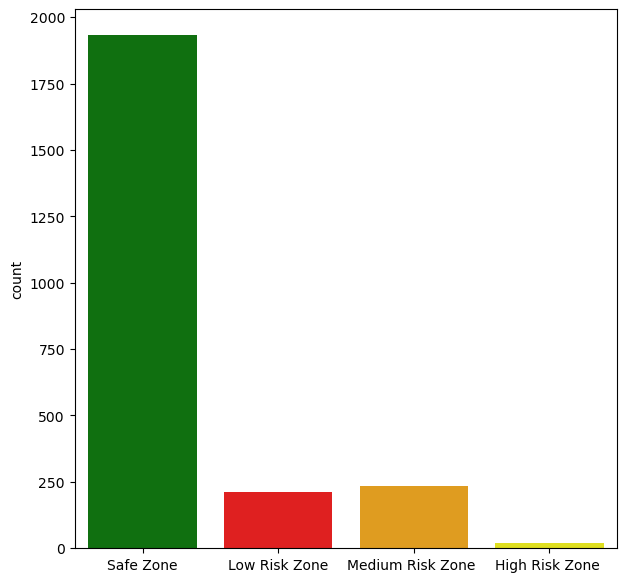

In [75]:
plt.figure(figsize=(7,7))
sns.countplot(x = zone,palette=c)

### 
From the above visual, the following retention strategies can be devised:
- A vast majority of employees with low and medium salaries lie in the safe attrition zone.

- A significant number of employees in the high and low risk attrition zone lie in the low and medium salary levels. Management may want to review the salaries of these employees to reduce the risk of attrition of these employeesees